In [3]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
from astropy.table import Table

plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)

parentdir = os.path.abspath("..")

# Reference Galaxy

In [4]:
# Plots to be saved at
plot_path = parentdir + '/plots/'

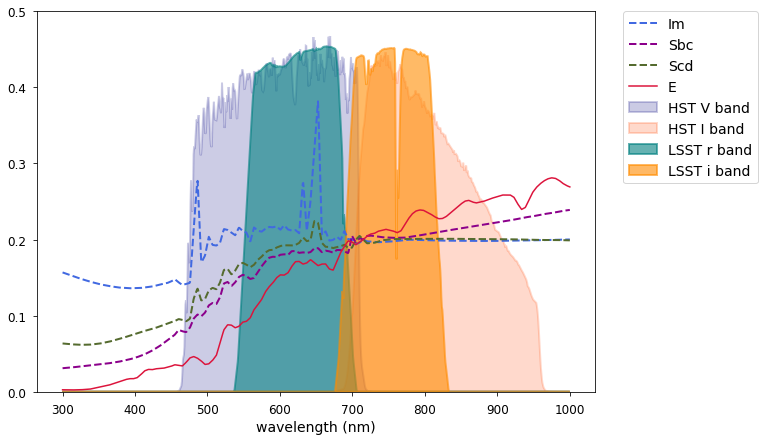

In [5]:
import galsim
os.sys.path.insert(0,parentdir) 
import cg_functions as cg_fn
path = '/afs/slac.stanford.edu/u/ki/sowmyak/code/test_CRG/'
disk_SED_names=['Im', 'Sbc', 'Scd']
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
bulge_SED_name ='E'
z=0.3
x=np.linspace(300,1000,1000)

plt.figure(figsize=[10,7])
V = cg_fn.get_HST_Bandpass('F606W')
I = cg_fn.get_HST_Bandpass('F814W')
r = galsim.Bandpass(path +'data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
i = galsim.Bandpass(path + 'data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)
for num, disk_SED_name in enumerate(disk_SED_names):
    d_SED = galsim.SED(path + "data/CWW_{}_ext.sed".format(disk_SED_name), 
                            wave_type='Ang', flux_type= 'flambda')
    d_SED = d_SED.withFluxDensity(0.2, 550.0).atRedshift(z)
    plt.plot(x,d_SED(x), label=disk_SED_name,linewidth=2,
             c=colors[num], linestyle='--')
b_SED = galsim.SED(path + "data/CWW_{}_ext.sed".format(bulge_SED_name), 
                            wave_type='Ang', flux_type= 'flambda')
b_SED = b_SED.withFluxDensity(0.2, 550.0).atRedshift(z)

plt.plot(x,b_SED(x), c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
#plt.title('SEDs at redshift={:.1f}'.format(z), size=16)
plt.fill(x,V(x), alpha=0.2, color='navy', label='HST V band', linewidth=2)
plt.fill(x,I(x), alpha=0.2, color='orangered', label='HST I band',linewidth=2)
plt.fill(x,r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,0.5])
plt.savefig(plot_path + "ref_gal_filters.png", 
             bbox_inches='tight')

('Im', -1.1420815560687052e-06, 4.6737421875344937e-05)
('Im', 1.5552300358906691e-06, 0.00052349171521882335)
('Sbc', -3.0107273790703568e-06, -0.00011683158944412976)
('Sbc', 2.4379376508365433e-06, 0.00073545100067478805)
('Scd', -1.0342928694957841e-06, -0.00011616706902467595)
('Scd', 1.5434861577494821e-06, 0.00050331375532397873)


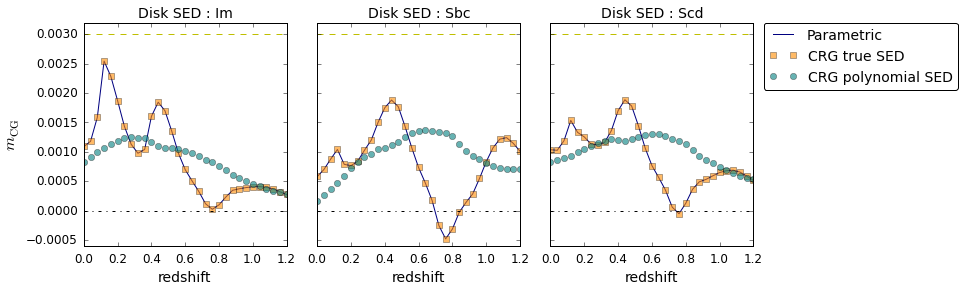

In [5]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat = {}
for dSED in dSEDs :
    path ='/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/ref_gal_results/'
    name = path + 'ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat[dSED] = Table.read(name,format='fits')

#plt.figure(1,figsize=[12,4])
#plt.subplots_adjust(wspace = 0.3)
#plt.subplots_adjust(hspace = 0.3)

fig, ax = plt.subplots(1, len(dSED), sharey=True, figsize=[12,4])
fig.subplots_adjust(wspace = 0.15)
fig.subplots_adjust(hspace = 0.15)
#ax=[[]]*3
for i,dSED in enumerate(dSEDs) :
    print(dSED, np.mean(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_tru_m1'].T[2]), np.mean(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_m1'].T[2]))
    print(dSED, np.std(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_tru_m1'].T[2]), np.std(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_m1'].T[2]))

    redshifts = cat[dSED]['redshift']
    ax[i].plot(redshifts, cat[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    ax[i].plot(redshifts, cat[dSED]['CRG_tru_m1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    ax[i].plot(redshifts, cat[dSED]['CRG_m1'].T[2],
             'o',label='CRG polynomial SED',color='teal', alpha=0.6)
    ax[i].axhline(0, linestyle= '-.', c='k')
    ax[i].axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    ax[i].set_xlabel('redshift', size=14)
    
    ax[i].set_title("Disk SED : %s"%dSED, size=14)
    ax[i].set_ylim([-0.0006, 0.0032])
ax[0].set_ylabel(r'$m_{\rm CG}$', size=16)
ax[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "ref_gal_cg_CRG.png", 
             bbox_inches='tight')



In [6]:
snr, m, m_std, m_err = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/model_cg_err_z_0.4.txt').T
in_snr = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/model_cg_err_z_0.4_i_band_snrs.txt')

In [7]:
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
np.interp(0.3,xp,fp)

0.001244251683184434

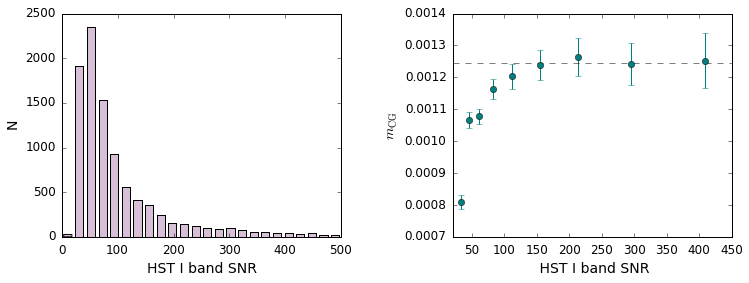

In [13]:
plt.figure(1,figsize=[12,4])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(1,2,2)
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
val = np.interp(0.3, xp, fp)
plt.axhline(val, linestyle= '--', c='k', alpha=0.5)
plt.errorbar(snr, m,yerr=m_err,color='teal',
                marker='o', linestyle='')
plt.xlabel(' HST I band SNR')
plt.ylabel(r'$m_{\rm CG}$')
plt.xlim([20,450])
# plt.title('cg bias of CRG from reference galaxy binned in SNR')
plt.subplot(1,2,1)
plt.ylabel('N')
plt.hist(in_snr,np.linspace(0,500,25),
         color='thistle',histtype='bar',rwidth=0.7)
plt.xlabel('HST I band SNR')
# plt.title('Histogram of SNR in I band')
plt.savefig(plot_path + "ref_gal_cg_snr.png", 
             bbox_inches='tight')

# Catsim

In [14]:
def get_plt_rng(arr):
    """Get 5th and 95th percentile"""
    return np.percentile(arr,5), np.percentile(arr,95)

In [15]:
cg_bias_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_catsim_cg_bias_only.fits', format='fits')

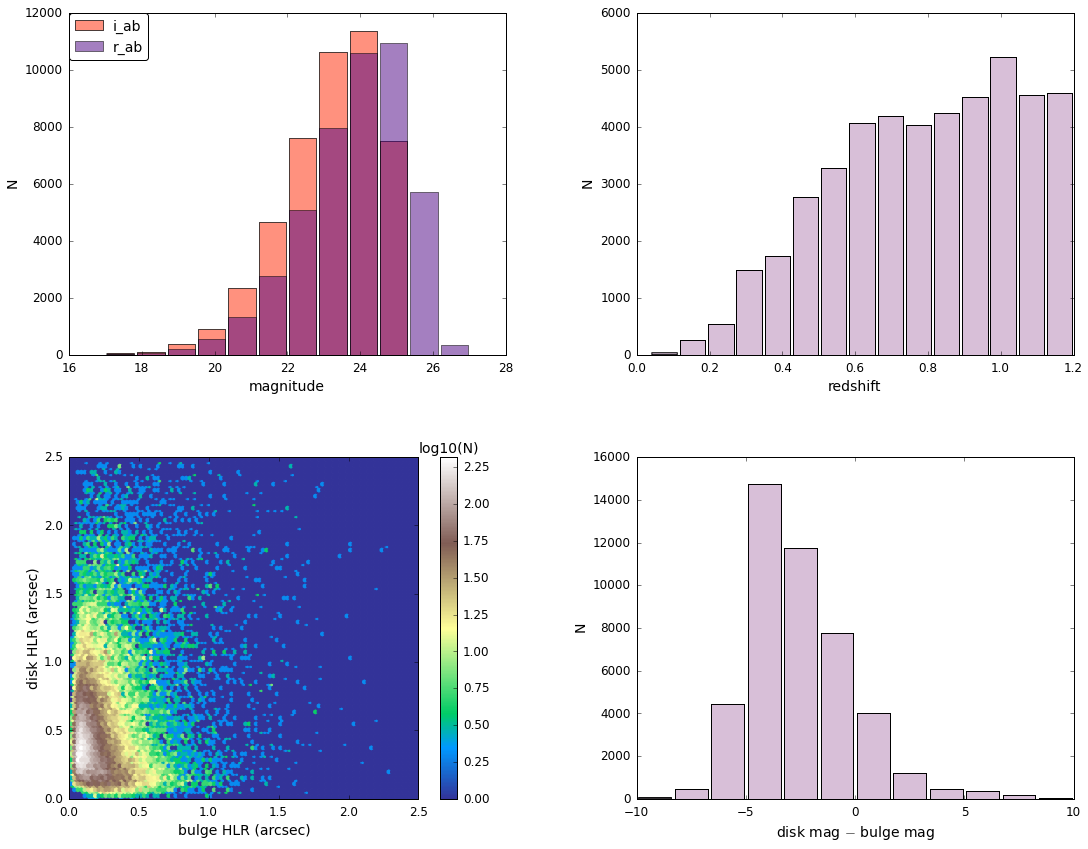

In [16]:
## Plot Catsim galaxy properties 
plt.figure(1,figsize=[18,30])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(4,2,1)
plt.hist(cg_bias_cat['i_ab'],np.linspace(17, 27,13),
         alpha=0.7,rwidth=0.9,
         color='tomato', label='i_ab')
plt.hist(cg_bias_cat['r_ab'],np.linspace(17, 27,13),
         alpha=0.5,rwidth=0.9,
         color='indigo', label='r_ab')
plt.xlabel('magnitude', size=14)
plt.ylabel("N")
plt.legend(loc=2)
#plt.title('Histogram of magnitudes', size=16)

plt.subplot(4,2,3)
x = cg_bias_cat['BulgeHalfLightRadius']
y = cg_bias_cat['DiskHalfLightRadius']
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(0,2.5,0,2.5), cmap='terrain')
plt.xlim([0,2.5])
plt.ylim([0,2.5])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('bulge HLR (arcsec)', size=14)
plt.ylabel('disk HLR (arcsec)', size=14)
#plt.title('Disk HLR vs Bulge HLR', size=16)

plt.subplot(4,2,2)
plt.ylabel("N")
plt.hist(cg_bias_cat['redshift_1'], 15,
         alpha=1,rwidth=0.9,
         color='thistle')
plt.xlabel('redshift', size=14)
#plt.title('Histogram of redshifts', size=16)

plt.subplot(4,2,4)
plt.hist(cg_bias_cat['magnorm_disk']-cg_bias_cat['magnorm_bulge'], np.linspace(-10,10,13),
         alpha=1,rwidth=0.9,
         color='thistle')
plt.ylabel("N")
#plt.title('Histogram of Disk-bulge magnitude', size=16)
plt.xlabel(r'disk mag $-$ bulge mag', size=14)
plt.savefig(plot_path + "cat_gal.png", 
             bbox_inches='tight')

# Results of cg analysis on catsim galaxies

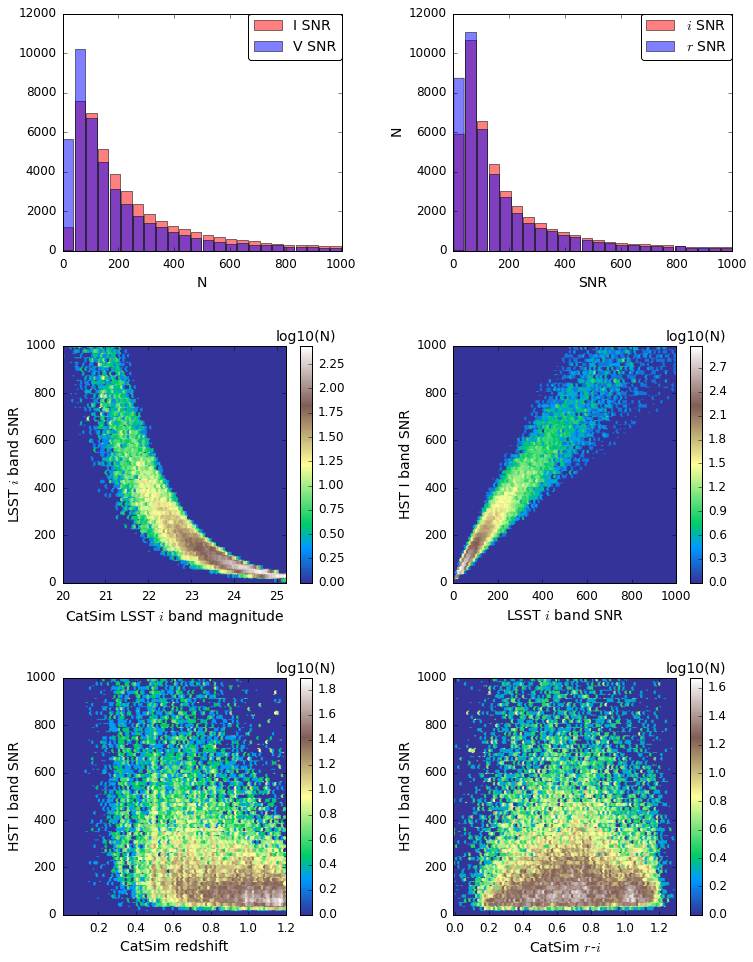

In [17]:
## Plot Catsim galaxy properties 
sn_max=1000
plt.figure(1,figsize=[12, 34])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(6,2,1)
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.5,
         color='r',rwidth=0.9, label='I SNR')
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.5,
         color='b',rwidth=0.9, label='V SNR')
plt.xlabel('SNR', size=14)
plt.xlabel('N', size=14)
plt.legend(loc=1)
# plt.title('Histogram of HST SNRs', size=16)

plt.subplot(6,2,2)
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.5,
         color='r',rwidth=0.9, label=r'$i$ SNR')
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.5,
         color='b',rwidth=0.9, label=r'$r$ SNR')
plt.xlabel('SNR', size=14)
plt.ylabel('N', size=14)
plt.legend(loc=0)
# plt.title('Histogram of LSST SNRs', size=16)

plt.subplot(6,2,3)
x = cg_bias_cat['i_ab']
y = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(int(xmin),25.2,0,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlim([20,25.2])
plt.ylim([0, 1000])
plt.xlabel(r'CatSim LSST $i$ band magnitude', size=14)
plt.ylabel(r'LSST $i$ band SNR', size=14)
# plt.title('LSST i mag vs SNR', size=16)

plt.subplot(6,2,4)
x = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log', extent=(0,1000, 0, 1000),
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel(r'LSST $i$ band SNR', size=14)
plt.ylabel('HST I band SNR', size=14)

plt.subplot(6,2,5)
x = cg_bias_cat['redshift_1']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(0.01,1.2, 0, 1000) ,bins='log',
            cmap='terrain')
clb = plt.colorbar()
plt.xlim([0.01, 1.2])
plt.ylim([0, 1000])
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('CatSim redshift', size=14)
plt.ylabel('HST I band SNR', size=14)

plt.subplot(6,2,6)
x =  cg_bias_cat['r_ab']- cg_bias_cat['i_ab']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(-0.01,1.3, 0, 1000) ,bins='log',
            cmap='terrain')
plt.ylim([0, 1000])
plt.xlim([-.01,1.3])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel(r'CatSim $r$-$i$', size=14)
plt.ylabel('HST I band SNR', size=14)

plt.savefig(plot_path + "cat_gal_snr.png", 
             bbox_inches='tight')

m_parametric = 2.68618201559e-05 +- 2.76814373529e-06
m_CRG = -0.00166002898473 +- 0.000500576566409


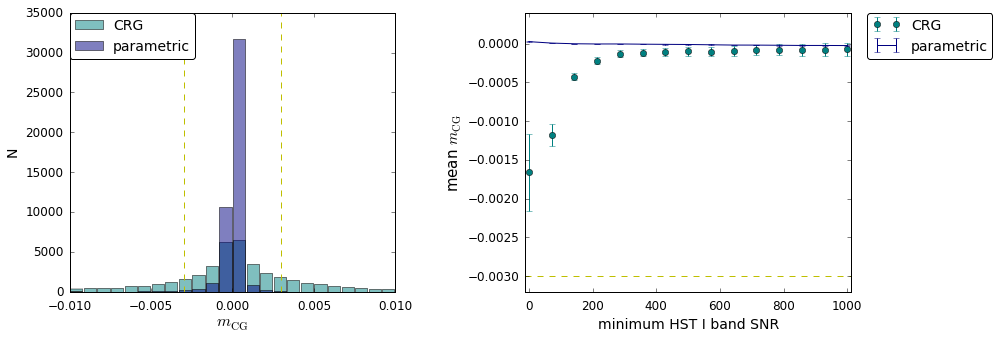

In [18]:
plt.figure(1,figsize=[14,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,2,1)
plt.hist(cg_bias_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25),
         alpha=0.5, rwidth=0.9,
         color='teal', label='CRG')
plt.hist(cg_bias_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25),
         alpha=0.5, rwidth=0.9,
         color='navy', label='parametric')

plt.locator_params(axis ='x', tight=True, nbins=7)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$', size=16)
plt.ylabel("N")
plt.legend(loc=2)
# plt.title('Histogram of m_cg', size=16)

plt.subplot(2,2,2)
snrs = np.linspace(0, 1000,15)
mean_m_para, mean_m_CRG = [],[]
mean_m_para_err, mean_m_CRG_err = [],[]
for s in snrs:
    q,= np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>s)
    p = cg_bias_cat['m_para1'][q].T[2]
    c = cg_bias_cat['m_CRG1'][q].T[2]
    mean_m_para.append(np.mean(p))
    mean_m_CRG.append(np.mean(c))
    mean_m_para_err.append(np.std(p)/len(q)**0.5)
    mean_m_CRG_err.append(np.hypot(np.std(c), 0.005)/len(q)**0.5)
plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err,
             c='teal', marker='o', linestyle='', label='CRG')
plt.errorbar(snrs, mean_m_para, yerr=mean_m_para_err,
             c='navy', label='parametric')

plt.xlim([-11, 1011])
plt.ylim([-0.0032, 0.0004])
plt.axhline(-0.003, linestyle='--', c='y')
plt.xlabel('minimum HST I band SNR', size=14)
plt.ylabel(r'mean $m_{\rm CG}$', size=15)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.savefig(plot_path + "cat_mcg_results.png", 
             bbox_inches='tight')
mean = np.mean(cg_bias_cat['m_para1'].T[2])
err = np.std(cg_bias_cat['m_para1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print "m_parametric = {0} +- {1}".format(mean, err)
mean = np.mean(cg_bias_cat['m_CRG1'].T[2])
err = np.std(cg_bias_cat['m_CRG1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print "m_CRG = {0} +- {1}".format(mean, err)

Results for galaxy with SNR >100


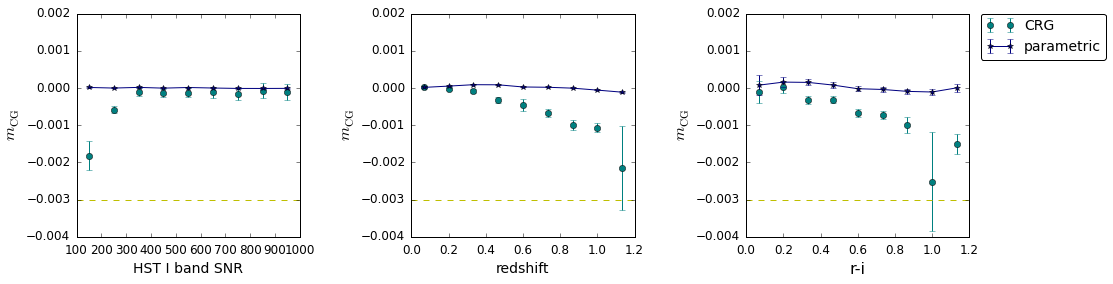

In [19]:
print "Results for galaxy with SNR >100"
plt.figure(1,figsize=[16,16])

q, = np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>100)

i=2
plt.subplot(3,3,1)
in_bins = np.linspace(100, 1000,10)
d = np.digitize(cg_bias_cat['HST_sn_ellip_gauss'].T[1][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
ystd = np.hypot(ystd, 0.005)
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('HST I band SNR', size=14)
plt.ylabel(r'$m_{\rm CG}$', size=16)
#plt.title('CG shear bias binned in I band SNR', size=16)


plt.subplot(3,3,2)
in_bins = np.linspace(0, 1.2,10)
d = np.digitize(cg_bias_cat['redshift_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('redshift', size=14)
plt.ylabel(r'$m_{\rm CG}$', size=16)
#plt.title('CG shear bias binned in redshift', size=16)

plt.subplot(3,3,3)
in_bins = np.linspace(0, 1.2,10)
x_in = cg_bias_cat['r_ab'][q]- cg_bias_cat['i_ab'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
ystd = np.hypot(ystd, 0.005)
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='', label='CRG')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
ystd = np.hypot(ystd, 0.005)
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-', label='parametric')
plt.ylim([-0.004,0.002])
plt.axhline(-0.003, linestyle='--', c='y')
plt.locator_params(axis='y',tight=True, nbins=6)
plt.xlabel('r-i', size=16)
plt.ylabel(r'$m_{\rm CG}$', size=16)
# plt.title('CG shear bias binned in color' , size=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "cat_mcg_bin.png", 
             bbox_inches='tight')

# Error on CRG

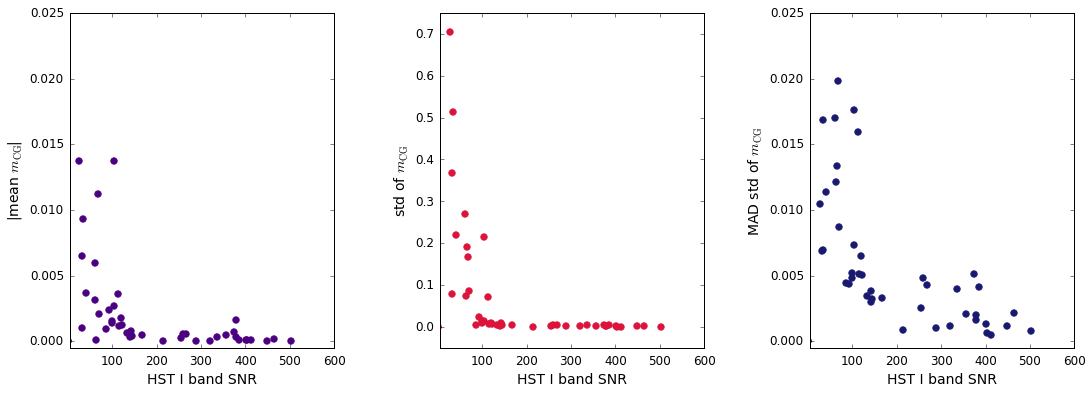

In [21]:
snr, m, m_std, m_err, m_madstd = np.loadtxt('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/catsim_cg_err_same_num.txt',).T

plt.figure(1,figsize=[18,6])
plt.subplots_adjust(hspace=0.4) 
plt.subplots_adjust(wspace = 0.4)

plt.subplot(1,3,2)
plt.scatter(snr, m_std, color='crimson', s=40)
plt.xlabel('HST I band SNR',size=14)
plt.ylabel(r'std of $m_{\rm CG}$',size=14)
#plt.title('Standard deviation of m_cg from CRG',size=15)
plt.xlim([5,600])
plt.ylim([-0.05,0.75])
plt.subplot(1,3,3)
plt.scatter(snr, m_madstd, color='midnightblue', s=40)
plt.xlabel('HST I band SNR',size=14)
plt.ylabel(r'MAD std of $m_{\rm CG}$',size=14)
#plt.title('Robust standard deviation of m_cg from CRG',size=15)
plt.xlim([5,600])
plt.ylim([-0.0005,0.025])

plt.subplot(1,3,1)
plt.scatter(snr, np.abs(m), color='indigo', s=40)
plt.xlabel('HST I band SNR',size=14)
plt.ylabel(r'|mean $m_{\rm CG}$|',size=14)
#plt.title('Robust standard deviation of m_cg from CRG',size=15)
plt.xlim([5,600])
plt.ylim([-0.0005,0.025])
plt.savefig(plot_path + "cat_mcg_err.png", 
             bbox_inches='tight')

## I band with noise

In [22]:
comb_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/catsim_cg_bias_multi_band.fits', format='fits')
print("i band: ", np.mean(comb_cat['m_para1_i'].T[2]), np.std(comb_cat['m_para1_i'].T[2])/float(len(comb_cat['m_para1_i'].T[2])))
print("r band: ", np.mean(comb_cat['m_para1'].T[2]), np.std(comb_cat['m_para1'].T[2])/float(len(comb_cat['m_para1'].T[2])))

('i band: ', 3.7229687105830368e-05, 4.6120756820241679e-09)
('r band: ', 2.6822272733833576e-05, 1.3167443801490171e-08)


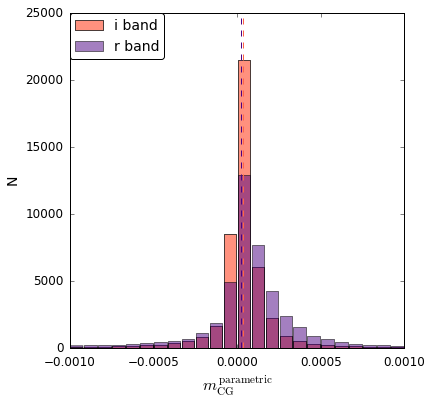

In [23]:
plt.figure(figsize=(6,6))
plt.hist(comb_cat['m_para1_i'].T[2],np.linspace(-0.001,0.001,25),
         alpha=0.7,rwidth=0.9,
         color='tomato', label='i band')
plt.hist(comb_cat['m_para1'].T[2],np.linspace(-0.001,0.001,25),
         alpha=0.5,rwidth=0.9,
         color='indigo', label='r band')
plt.axvline(np.mean(comb_cat['m_para1'].T[2]), linestyle='--', color='indigo')
plt.axvline(np.mean(comb_cat['m_para1_i'].T[2]), linestyle='--', color='tomato')
plt.xlabel(r'$m_{\rm CG}^{\rm parametric}$', size=16)
plt.legend(loc=2)
plt.ylabel("N")
plt.savefig(plot_path + "cat_para_i_r.png", 
             bbox_inches='tight')

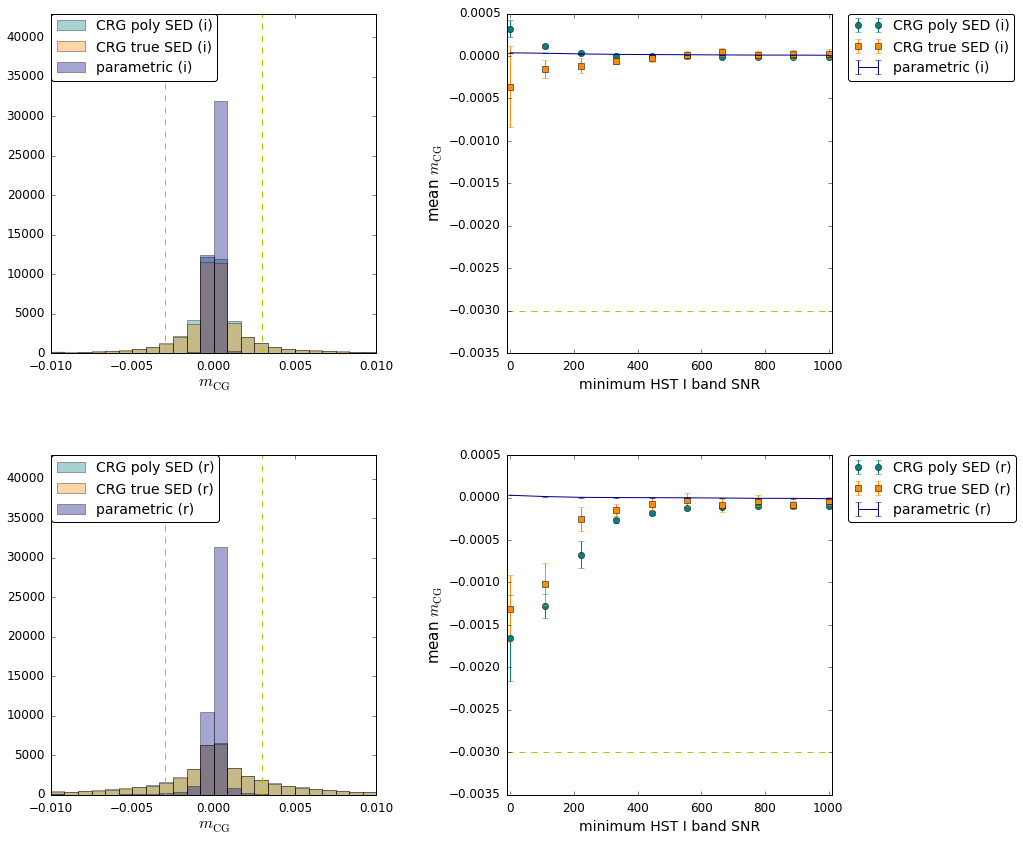

In [24]:
snrs = np.linspace(0, 1000,10)
plt.figure(1,figsize=[14,14])
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace = 0.4)
plt.subplot(2,2,1)

plt.hist(comb_cat['m_CRG1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='teal', label='CRG poly SED (i)')
plt.hist(comb_cat['m_CRG_tru1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='Darkorange', label='CRG true SED (i)')
plt.hist(comb_cat['m_para1_i'].T[2], np.linspace(-0.01,0.01,25), alpha=0.35,
         color='navy', label='parametric (i)')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$', size=16)
#plt.title('Histogram of m_cg in i band')
plt.locator_params(tight=True, nbins=6, axis='x')
# plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.legend(loc=2)
plt.ylim([0, 43000])

#plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.subplot(2,2,2)
mean_m_para_i, mean_m_CRG1_i, mean_m_CRG2_i = [],[],[]
mean_m_para_err_i, mean_m_CRG1_err_i, mean_m_CRG2_err_i = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1_i'][q].T[2]
    c1 = comb_cat['m_CRG1_i'][q].T[2]
    c2 = comb_cat['m_CRG_tru1_i'][q].T[2]
    mean_m_para_i.append(np.mean(p))
    mean_m_CRG1_i.append(np.mean(c1))
    mean_m_CRG2_i.append(np.mean(c2))
    mean_m_para_err_i.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_i.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_i.append(np.std(c2)/len(q)**0.5)
    

plt.errorbar(snrs, mean_m_CRG1_i, yerr=mean_m_CRG1_err_i, marker='o',linestyle='',
             c='teal', label='CRG poly SED (i)')
plt.errorbar(snrs, mean_m_CRG2_i, yerr=mean_m_CRG2_err_i, marker='s',linestyle='',
             c='Darkorange', label='CRG true SED (i)')
plt.errorbar(snrs, mean_m_para_i, yerr=mean_m_para_err_i, label='parametric (i)', c='navy')
plt.xlabel('minimum HST I band SNR')
plt.ylabel(r'mean $m_{\rm CG}$', size=15)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
#plt.title('m_cg in i band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.xlim([-11, 1011])
plt.ylim([-0.0035, 0.0005])


plt.subplot(2,2,3)


plt.hist(comb_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='teal', label='CRG poly SED (r)')

plt.hist(comb_cat['m_CRG2'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='Darkorange', label='CRG true SED (r)')
plt.hist(comb_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25), alpha=0.35,
         color='navy', label='parametric (r)')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$', size=16)
#plt.title('Histogram of m_cg in r band')
plt.locator_params(tight=True, nbins=6, axis='x')
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.legend(loc=2)
plt.ylim([0, 43000])
#plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.subplot(2,2,4)
mean_m_para_r, mean_m_CRG1_r, mean_m_CRG2_r = [],[],[]
mean_m_para_err_r, mean_m_CRG1_err_r, mean_m_CRG2_err_r = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1'][q].T[2]
    c1 = comb_cat['m_CRG1'][q].T[2]
    c2 = comb_cat['m_CRG_tru1'][q].T[2]
    mean_m_para_r.append(np.mean(p))
    mean_m_CRG1_r.append(np.mean(c1))
    mean_m_CRG2_r.append(np.mean(c2))
    mean_m_para_err_r.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_r.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_r.append(np.std(c2)/len(q)**0.5)
    

plt.errorbar(snrs, mean_m_CRG1_r, yerr=mean_m_CRG1_err_r, c='teal',marker='o',
             linestyle='', label='CRG poly SED (r)')
plt.errorbar(snrs, mean_m_CRG2_r, yerr=mean_m_CRG2_err_r, c='Darkorange',marker='s',
             linestyle='' ,label='CRG true SED (r)')
plt.errorbar(snrs, mean_m_para_r, yerr=mean_m_para_err_r, label='parametric (r)',c='navy')
plt.xlim([-11, 1011])
plt.xlabel('minimum HST I band SNR')
plt.ylabel(r'mean $m_{\rm CG}$', size=15)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.ylim([-0.0035, 0.0005])
#plt.title('m_cg in r band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')
plt.savefig(plot_path + "cat_mcg_i_r.png", 
             bbox_inches='tight')